In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [2]:
# read Data
dataset = pd.read_csv('DataSets/4. covid_19_data.csv')

In [3]:
# view the first 5 rows
dataset.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [4]:
# checking sum of missing values for each column
dataset.isna().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [5]:
# dataset[pd.isna(dataset['State'])]


In [6]:
# dropping the state column, it has more than 50% values as "NaN"
dataset.drop(columns='State', axis=1, inplace=True)

In [7]:
# Check statistics for dataset
dataset.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [8]:
# checking how many unuque values each column has
dataset.nunique()

Date           1
Region       187
Confirmed    282
Deaths       142
Recovered    195
dtype: int64

In [9]:
# converting Date column to datetime datatype
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [10]:
# checking correlation between columns
numeric_columns = ['Confirmed', 'Deaths', 'Recovered']
correlation_matrix = dataset[numeric_columns].corr()

In [11]:
correlation_matrix

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.907294,0.596008
Deaths,0.907294,1.000000,0.519295
Recovered,0.596008,0.519295,1.000000


In [12]:
# see the number of appearance for each values in a column
dataset['Region'].value_counts()

Region
US                58
Mainland China    31
Canada            15
UK                11
France            11
                  ..
Haiti              1
Holy See           1
Honduras           1
Hungary            1
Germany            1
Name: count, Length: 187, dtype: int64

In [13]:
# Setting date as index
dataset.set_index('Date', inplace=True)

<Axes: ylabel='Region'>

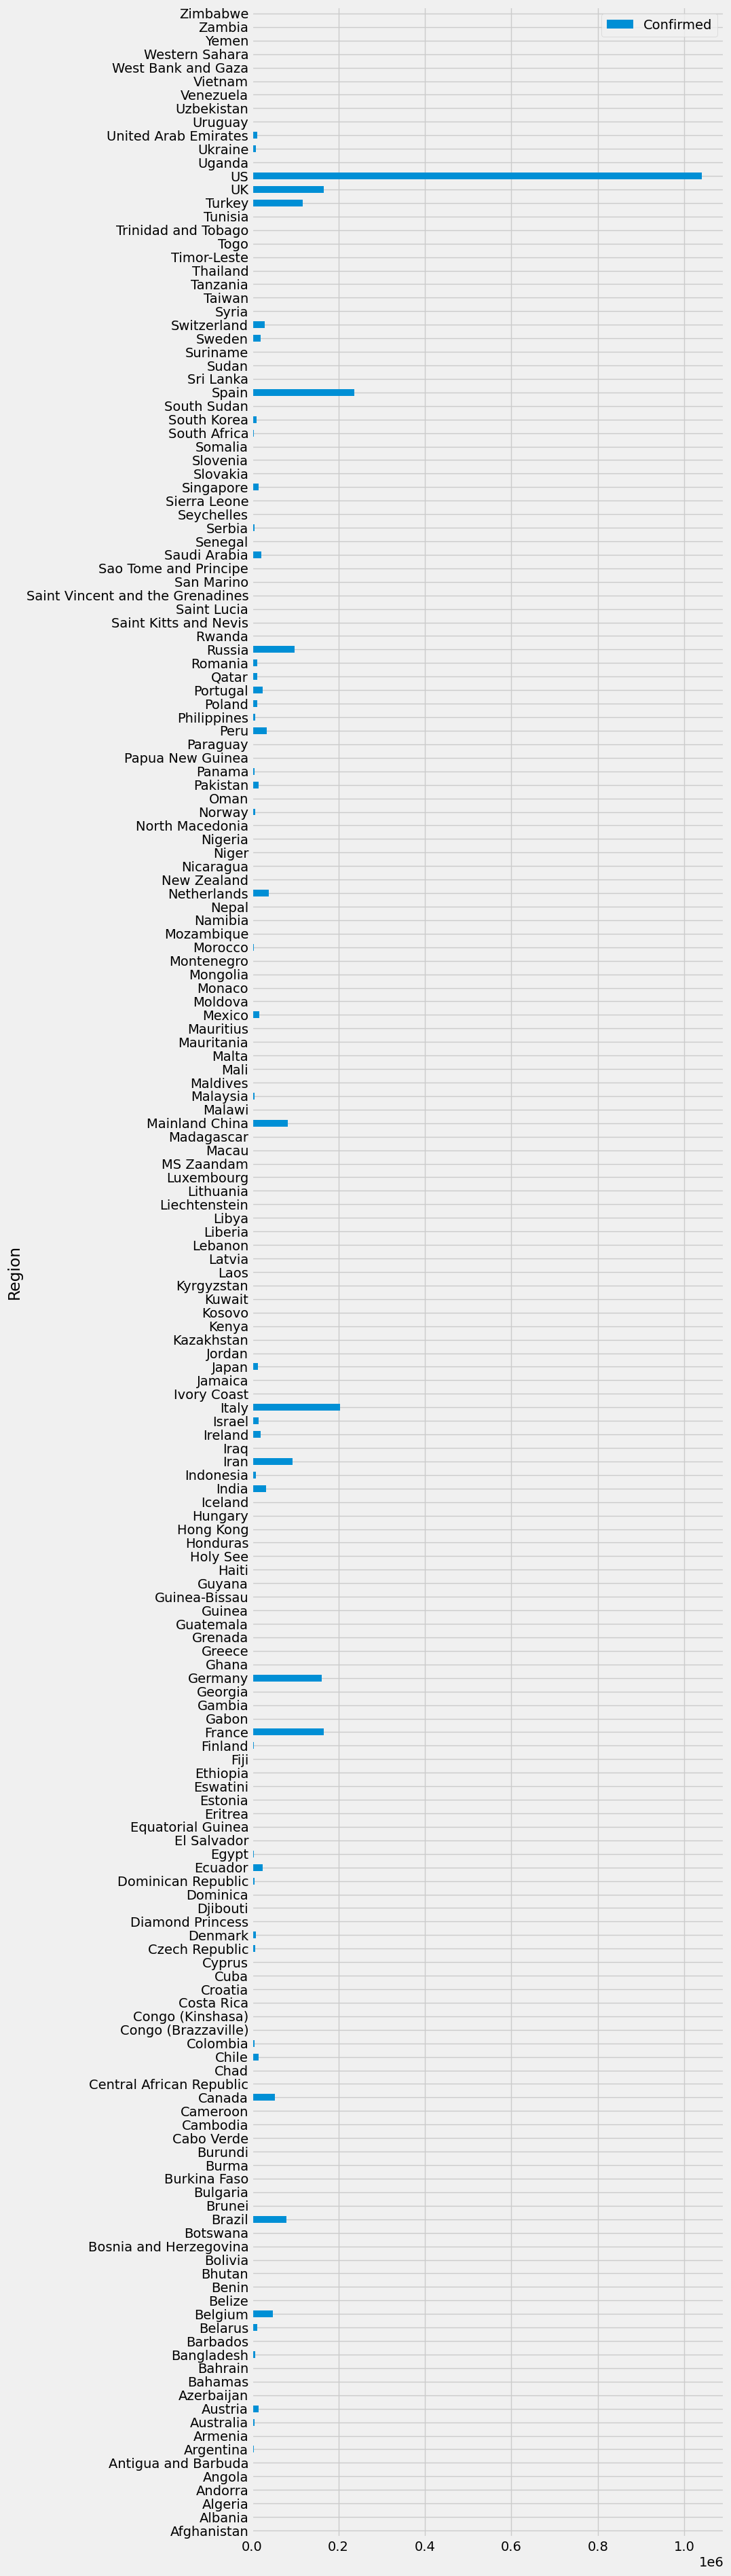

In [14]:
region_dataset = dataset.groupby('Region')['Confirmed'].sum().reset_index()
region_dataset.plot(kind='barh', x='Region', y='Confirmed', figsize=(8, 46))


<Axes: ylabel='Region'>

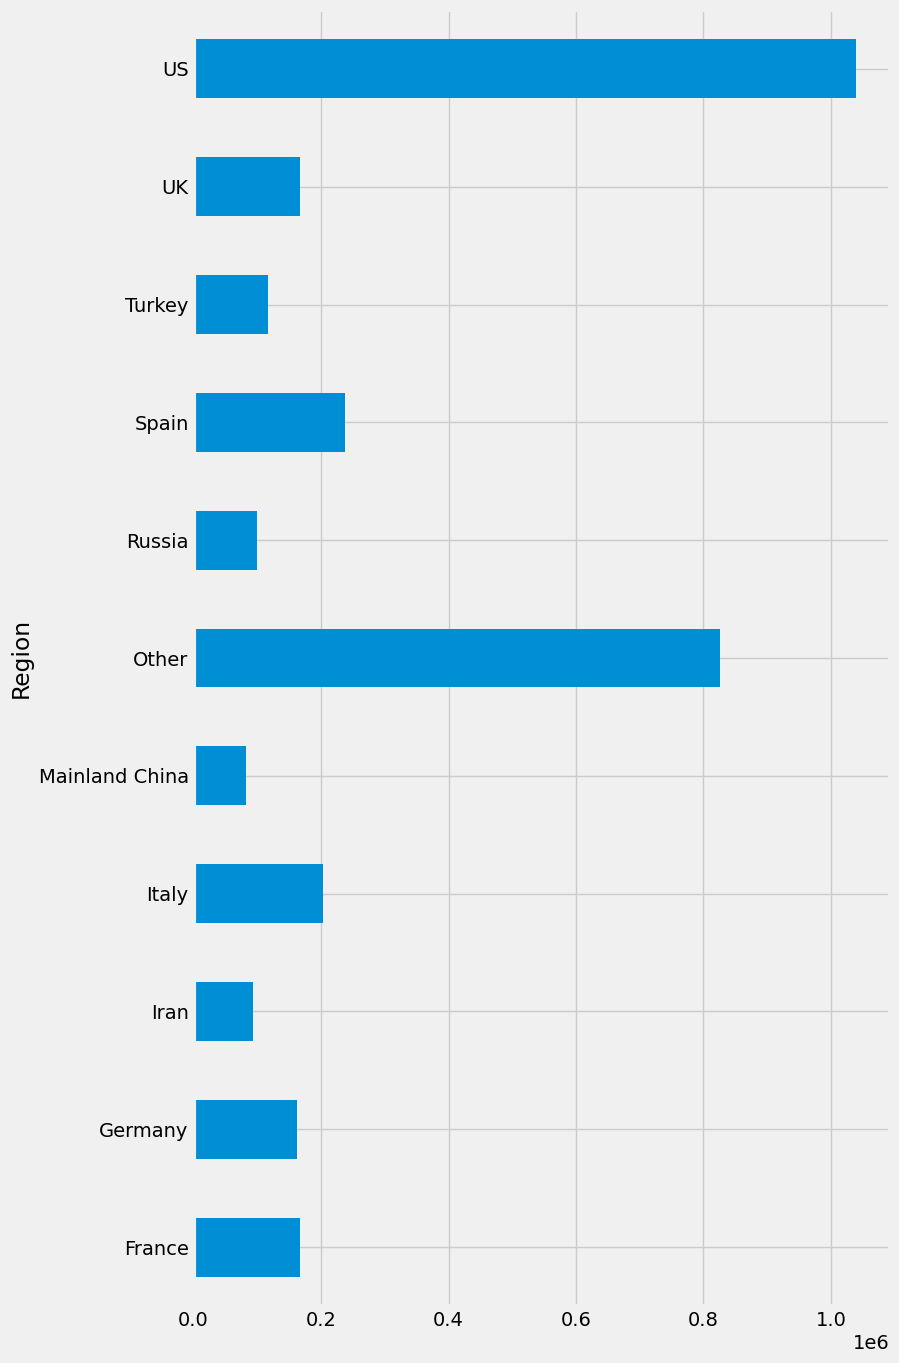

In [15]:
top_n = 10  # Number of top regions to show
top_regions = dataset.groupby('Region')['Confirmed'].sum().nlargest(top_n).index
modified_dataset = dataset.copy()  # Create a copy of the original dataset

# Assign 'Other' to regions not in the top regions
modified_dataset['Region'] = np.where(modified_dataset['Region'].isin(top_regions), modified_dataset['Region'], 'Other')

# Plot the modified dataset
modified_dataset.groupby('Region')['Confirmed'].sum().plot(kind='barh', figsize=(8, 16))


In [16]:
import squarify

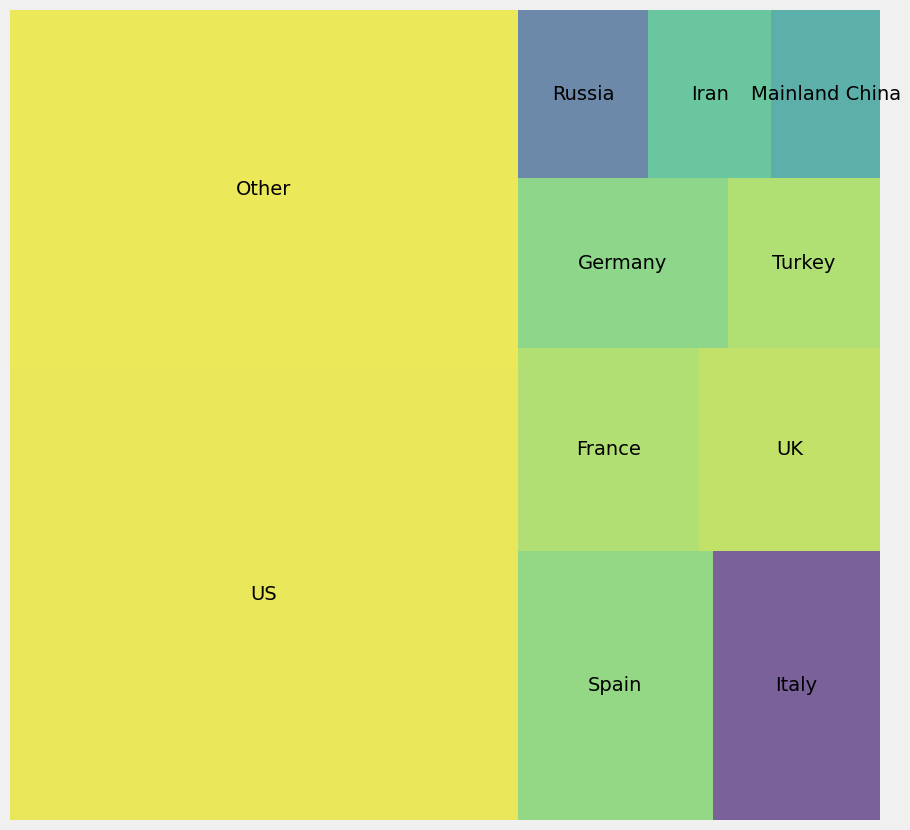

In [17]:
import squarify

# Group regions and calculate confirmed cases
region_dataset = modified_dataset.groupby('Region')['Confirmed'].sum().reset_index()

# Sort by confirmed cases
region_dataset = region_dataset.sort_values('Confirmed', ascending=False)

# Plot treemap
plt.figure(figsize=(10, 10))
squarify.plot(sizes=region_dataset['Confirmed'], label=region_dataset['Region'], alpha=0.7)
plt.axis('off')
plt.show()


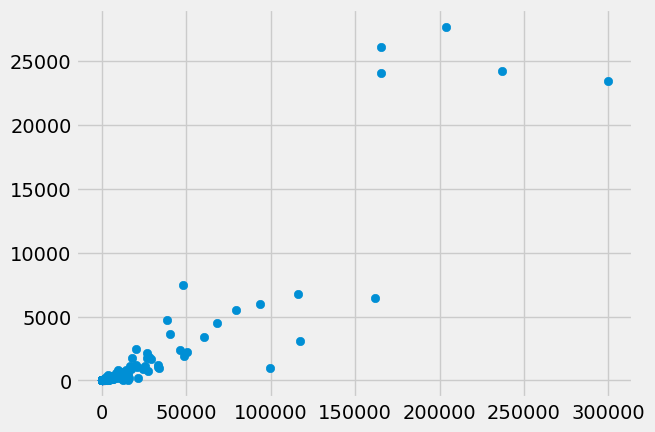

In [18]:
# Scatter plot of confirmed cases vs. deaths:
plt.scatter(modified_dataset['Confirmed'], dataset['Deaths'])

In [19]:
fig = px.choropleth(dataset, locations='Region',
                    locationmode='country names',
                    color='Confirmed',
                    hover_name='Region',
                    color_continuous_scale='Viridis',
                    range_color=(0, dataset['Confirmed'].max()))  # Set the range of the color scale

fig.update_layout(
    width=1000, height=600,  # Set the size of the outer figure
    margin=dict(l=0, r=0, t=0, b=0, pad=0),  # Remove margins and padding
)

fig.update_layout(
    coloraxis_colorbar=dict(
        xpad=20,  # Adjust the horizontal padding of the colorbar
        ypad=20,  # Adjust the vertical padding of the colorbar
    )
)

fig.show(config={'displayModeBar': False})  # Hide the mode bar

In [20]:
fig = px.scatter(dataset, x='Confirmed', y='Deaths', size='Confirmed', color='Region', hover_name='Region', log_x=True, log_y=True)
fig

In [21]:
fig = px.bar(dataset, x='Region', y='Recovered', color='Region', hover_name='Region')
fig.show()
